# Importowanie Bibliotek
Import niezbędnych bibliotek: TensorFlow, Keras, NumPy, Pandas oraz bibliotek do przetwarzania danych.

Użyte biblioteki:
- tensorflow/keras - dla modelu neuronowego
- sklearn - do przetwarzania danych
- seaborn/matplotlib - do wizualizacji
- numpy/pandas - do operacji na danych

In [53]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import Sequential 
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Wczytanie i Przefiltrowanie Danych
Import bibliotek, wczytanie danych i wybranie 20 najliczniejszych gatunków piwa. Użycie value_counts() i nlargest() do filtrowania.

- Dane: Plik CSV zawiera informacje o piwach, w tym styl, parametry warzenia i skład.
- Normalizacja: Dane są skalowane przy użyciu StandardScaler, co poprawia wydajność modelu.
- Kodowanie etykiet: LabelEncoder zamienia nazwy stylów piwa na liczby.
- Podział danych: Dane podzielono na zbiory treningowe (80%) i testowe (20%).
- Konwersja na format kategoryczny: Przygotowanie etykiet do klasyfikacji wieloklasowej (to_categorical).

In [54]:
data = pd.read_csv('../data.csv')

top_20_styles = data['Style'].value_counts().nlargest(20).index
filtered_data = data[data['Style'].isin(top_20_styles)]

numeric_columns = ['Size(L)', 'OG', 'FG', 'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency']
X = filtered_data[numeric_columns].copy()

X = X.fillna(X.mean())

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(filtered_data['Style'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

num_classes = len(np.unique(y))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print("Kształt danych treningowych:", X_train.shape)
print("Kształt danych testowych:", X_test.shape)
print("Kształt etykiet treningowych:", y_train.shape)
print("Kształt etykiet testowych:", y_test.shape)

Kształt danych treningowych: (34216, 10)
Kształt danych testowych: (8554, 10)
Kształt etykiet treningowych: (34216, 20)
Kształt etykiet testowych: (8554, 20)


# Policzenie liczby piw dla top 20 gatunków


Najczęściej występujące gatunki:
1. American IPA
2. American Pale Ale
3. Saison
4. American Amber Ale
5. Blonde Ale
[...]

Wizualizacja:
- Wykres słupkowy pokazujący liczebność każdego z 20 gatunków
- Oś X: nazwy gatunków
- Oś Y: liczba piw

Top 20 najczęstszych gatunków piwa:
American IPA: 11940 piw
American Pale Ale: 7581 piw
Saison: 2617 piw
American Light Lager: 2277 piw
American Amber Ale: 2038 piw
Blonde Ale: 1753 piw
Imperial IPA: 1478 piw
American Stout: 1268 piw
Irish Red Ale: 1204 piw
American Brown Ale: 1152 piw
Witbier: 1072 piw
California Common Beer: 1044 piw
Weissbier: 988 piw
Oatmeal Stout: 961 piw
Russian Imperial Stout: 929 piw
Weizen/Weissbier: 919 piw
Sweet Stout: 919 piw
Robust Porter: 897 piw
K�lsch: 869 piw
Double IPA: 864 piw


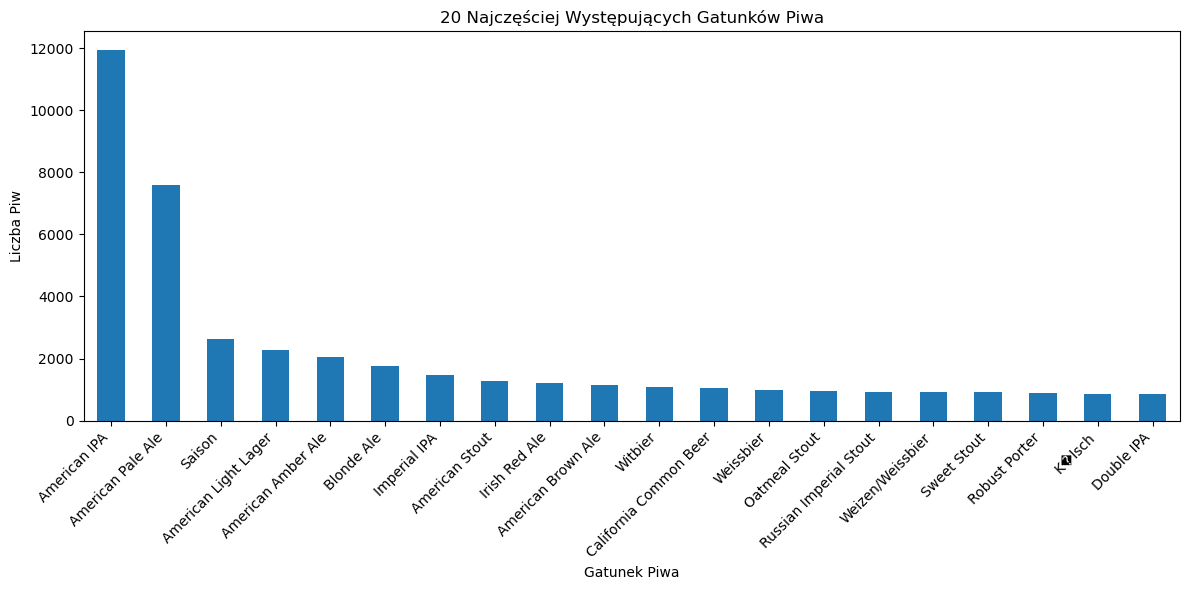

In [55]:
top_20_gatunkow = data['Style'].value_counts().head(20)

print("Top 20 najczęstszych gatunków piwa:")
print("====================================")
for gatunek, liczba in top_20_gatunkow.items():
    print(f"{gatunek}: {liczba} piw")

plt.figure(figsize=(12, 6))
top_20_gatunkow.plot(kind='bar')
plt.title('20 Najczęściej Występujących Gatunków Piwa')
plt.xlabel('Gatunek Piwa')
plt.ylabel('Liczba Piw')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Utworzenie Modelu
Utworzenie modelu sekwencyjnego z warstwami Dense, dostosowanie liczby neuronów w warstwie wyjściowej do 20 klas.

- Architektura sieci:
  - Model sekwencyjny z warstwami gęstymi (Dense) o aktywacji ReLU.
  - BatchNormalization dla stabilizacji procesu uczenia.
  - Dropout (50%) dla regularizacji i unikania przeuczenia.
  - Warstwa wyjściowa z 20 neuronami (po jednym dla każdego stylu), aktywacja softmax.
- Kompilacja: Optymalizator Adam, funkcja straty categorical_crossentropy, metryka dokładności.

In [56]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),  
    BatchNormalization(), 
    Dropout(0.5), 
    Dense(128, activation='relu'),  
    BatchNormalization(),  
    Dropout(0.5), 
    Dense(64, activation='relu'),  
    BatchNormalization(), 
    Dropout(0.5),
    Dense(32, activation='relu'), 
    BatchNormalization(), 
    Dropout(0.5), 
    Dense(20, activation='softmax') 
])

model.compile(optimizer=Adam(learning_rate=0.001),  
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()  

C:\Users\kubal\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 256)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 20)             │           660 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,628 (189.95 KB)

 Trainable params: 47,668 (186.20 KB)

 Non-trainable params: 960 (3.75 KB)

# Trenowanie Modelu
Trenowanie modelu na przefiltrowanych danych, wizualizacja procesu uczenia za pomocą wykresów.

- Callbacki:
  - EarlyStopping: Przerywa trening, jeśli dokładność walidacji przestaje się poprawiać.
  - ReduceLROnPlateau: Zmniejsza szybkość uczenia w przypadku braku poprawy.
- Proces treningu:
  - Model uczono przez maksymalnie 100 epok z batch size 16.
  - Dokładność walidacji osiągnęła około 52%, a strata testowa wyniosła 1.44.

Epoch 1/100
1711/1711 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.2281 - loss: 2.7874 - val_accuracy: 0.4258 - val_loss: 1.7593 - learning_rate: 0.0010
Epoch 2/100
1711/1711 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3709 - loss: 1.9298 - val_accuracy: 0.4437 - val_loss: 1.6441 - learning_rate: 0.0010
Epoch 3/100
1711/1711 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3859 - loss: 1.8557 - val_accuracy: 0.4605 - val_loss: 1.6124 - learning_rate: 0.0010
Epoch 4/100
1711/1711 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4078 - loss: 1.8021 - val_accuracy: 0.4833 - val_loss: 1.5761 - learning_rate: 0.0010
Epoch 5/100
1711/1711 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4039 - loss: 1.7884 - val_accuracy: 0.4750 - val_loss: 1.5573 - learning_rate: 0.0010
Epoch 6/100
1711/1711 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4146 - loss: 1.7693 - val_accuracy: 0.4839 - val_loss: 1.5669 - learning_rate: 0.0010
Epoch 7/100
1711/1711 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4

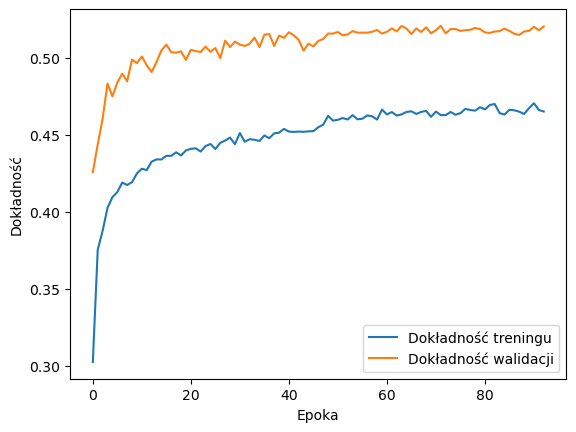

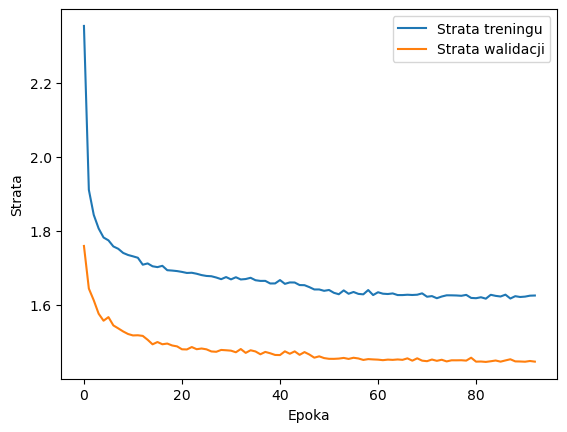

In [57]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=16, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])

plt.plot(history.history['accuracy'], label='Dokładność treningu')
plt.plot(history.history['val_accuracy'], label='Dokładność walidacji')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Strata treningu')
plt.plot(history.history['val_loss'], label='Strata walidacji')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()
plt.show()

# Ewaluacja
Ocena modelu na zbiorze testowym, generowanie macierzy pomyłek i raportu klasyfikacji dla 20 wybranych gatunków.

268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5175 - loss: 1.4400
Test Loss: 1.4361211061477661
Test Accuracy: 0.5215104222297668
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
                        precision    recall  f1-score   support

    American Amber Ale       0.46      0.46      0.46       390
    American Brown Ale       0.47      0.63      0.54       205
          American IPA       0.68      0.77      0.72      2394
  American Light Lager       0.33      0.19      0.24       450
     American Pale Ale       0.59      0.61      0.60      1562
        American Stout       0.43      0.53      0.47       258
            Blonde Ale       0.26      0.42      0.32       314
California Common Beer       0.00      0.00      0.00       216
            Double IPA       0.00      0.00      0.00       160
          Imperial IPA       0.43      0.57      0.49       310
         Irish Red Ale       0.54      0.56      0.55       255
                K�lsch       0.40      0.01      0.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


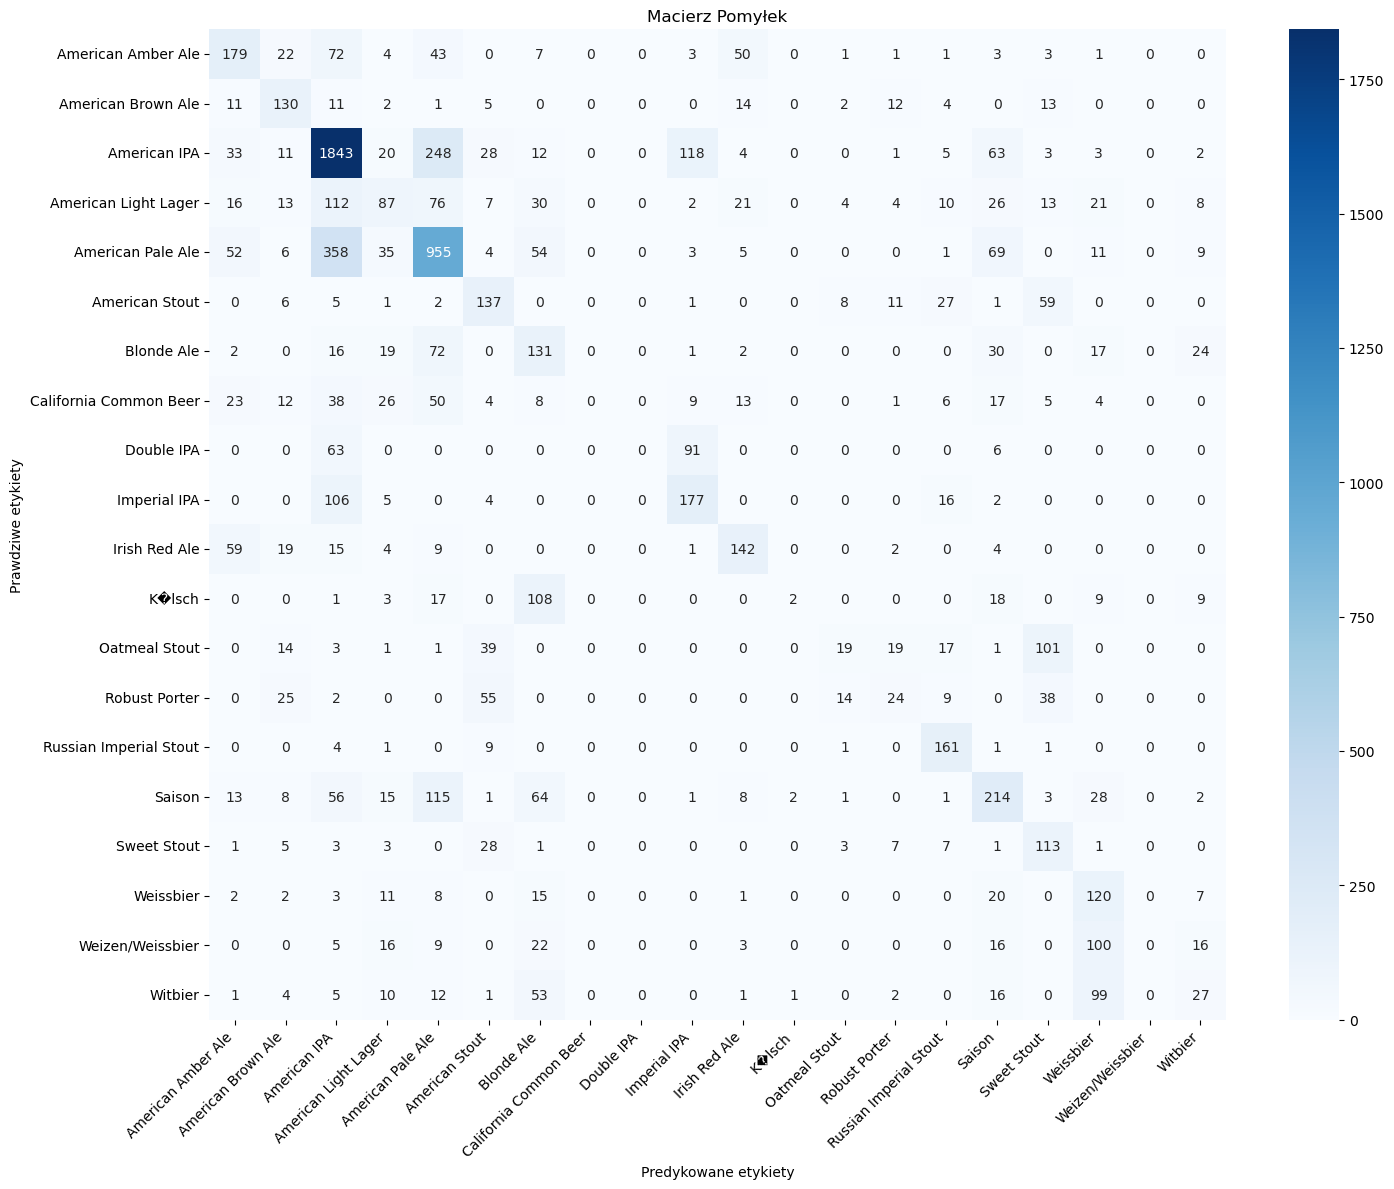

In [58]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)  

print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(15, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.xlabel('Predykowane etykiety')
plt.ylabel('Prawdziwe etykiety')
plt.title('Macierz Pomyłek')
plt.tight_layout()
plt.show()

In [59]:
y_test_classes = np.argmax(y_test, axis=1)

unique, counts = np.unique(y_test_classes, return_counts=True)
style_counts = dict(zip(unique, counts))

for style, count in sorted(style_counts.items(), key=lambda x: x[1], reverse=True):

    print(f"Styl {style}: {count} piw")

Styl 2: 2394 piw
Styl 4: 1562 piw
Styl 15: 532 piw
Styl 3: 450 piw
Styl 0: 390 piw
Styl 6: 314 piw
Styl 9: 310 piw
Styl 5: 258 piw
Styl 10: 255 piw
Styl 19: 232 piw
Styl 7: 216 piw
Styl 12: 215 piw
Styl 1: 205 piw
Styl 17: 189 piw
Styl 18: 187 piw
Styl 14: 178 piw
Styl 16: 173 piw
Styl 11: 167 piw
Styl 13: 167 piw
Styl 8: 160 piw


# Zapisywanie Modelu
Zapisanie wytrenowanego modelu do pliku i przetestowanie jego wczytywania.

- Model zapisano jako plik .h5 dla ponownego użycia.
- Wczytywany model działa poprawnie i osiąga wyniki identyczne z oryginalnym modelem.

In [60]:
model.save('../models/model_klasyfikacji_20_styli_piwa.h5')

loaded_model = keras.models.load_model('../models/model_klasyfikacji_20_styli_piwa.h5')

loaded_model.summary()

loaded_test_loss, loaded_test_accuracy = loaded_model.evaluate(X_test, y_test)

print(f'Loaded Test Loss: {loaded_test_loss}')
print(f'Loaded Test Accuracy: {loaded_test_accuracy}')

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 256)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 20)             │           660 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,630 (189.96 KB)

 Trainable params: 47,668 (186.20 KB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 2 (12.00 B)

268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5175 - loss: 1.4400
Loaded Test Loss: 1.4361211061477661
Loaded Test Accuracy: 0.5215104222297668


In [61]:
def przewiduj_gatunek_piwa(dane):
    if 'model' not in globals():
        global model
        model = keras.models.load_model('../models/model_klasyfikacji_piwa.h5')
    
    dane_scaled = scaler.transform([dane])
    
    predykcja = model.predict(dane_scaled)
    gatunek_index = np.argmax(predykcja, axis=1)[0]
    gatunek = label_encoder.inverse_transform([gatunek_index])[0]
    
    return gatunek

"""
    'Size(L)': 20.0,              # Typowa wielkość warzenia w litrach
    'OG': 1.050,                 # Początkowa gęstość, często 1.045 - 1.060
    'FG': 1.010,                 # Końcowa gęstość, zazwyczaj 1.008 - 1.014
    'ABV': 5.4,                  # Zawartość alkoholu w %, tu podana konkretna
    'IBU': 35,                   # Goryczka, typowo w zakresie 30 - 50
    'Color': 10,                 # Kolor w SRM, odpowiednik około 20 EBC
    'BoilSize': 25.0,            # Objętość brzeczki przed gotowaniem w litrach
    'BoilTime': 60,              # Czas gotowania w minutach, standardowo 60
    'BoilGravity': 1.045,        # Gęstość przed gotowaniem, nieco niższa niż OG
    'Efficiency': 75             # Wydajność procesu, typowo 70-75%
"""

Zywiec_APA = numeric_columns = [20.0, 1.050, 1.010, 5.4, 35, 10, 25.0, 60, 1.045, 75]

gatunek = przewiduj_gatunek_piwa(Zywiec_APA)
print(f'Przewidywany gatunek piwa: {gatunek}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Przewidywany gatunek piwa: American Pale Ale


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
